In [1]:
from IPython.display import display, Markdown
import random
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import time

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = [5, 5]

### Random movement: Random walks and brownian motion

A random walk is the random movement on integers in discrete time. This can be in 1D, 2D, 3D,... space. Brownian motion is a random walk in continuous time and space. 

Below, we simulate random walks and brownian motion in 1D and 2D space with Python.

#### Further reading:   
https://en.wikipedia.org/wiki/Random_walk  
https://dlsun.github.io/probability/brownian-motion.html#essential-practice-37   
Random walk models in biology https://royalsocietypublishing.org/doi/10.1098/rsif.2008.0014  
https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/18%3A_Brownian_Motion/18.01%3A_Standard_Brownian_Motion



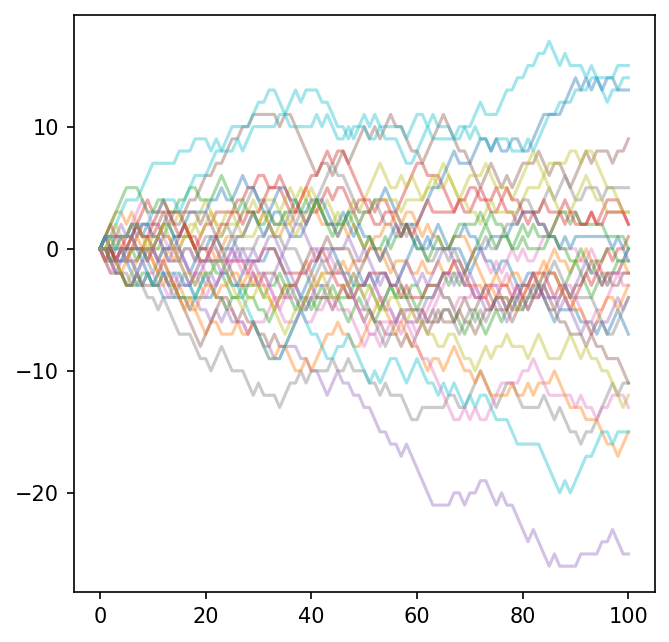

In [82]:

def random_walk_1D(x):
    start = 0 
    positions = [start]

    for n in range(x):
        positions.append(positions[-1]+random.choice([-1,0,1])) #each step a -1, 0 or 1 is added the last position with an equal probability for each choice.
           
    plt.plot(positions,alpha=0.4)
    return positions

output_all=[]
for i in range(30):
    output_all.append(random_walk_1D(100)) 


#plt.errorbar(range(len(output_all[0])),[np.average(y) for y in np.array(output_all).T],yerr=[np.std(y) for y in np.array(output_all).T])


Notice that the position at time t is given by a binomial distribution (=normal distribution in discrete space) with mean equal to the starting position (here zero) and variance proportional to the number of steps taken.

Now lets simulate a random walk in 2D space:

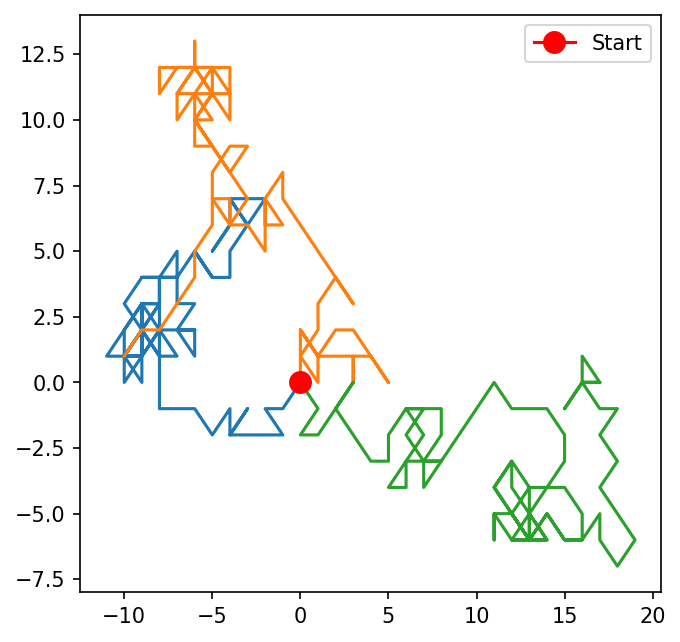

In [83]:
def random_walk_2D(x):
    start = (0,0) 
    positions = [start]

    for n in range(x):
        x=positions[-1][0] + random.choice([-1,0,1])
        y=positions[-1][1] + random.choice([-1,0,1])
        positions.append((x,y))
 
    x,y=np.array(positions).T
    plt.plot(x,y)
    
for i in range(3):
    random_walk_2D(100)  
plt.plot(0,0, marker='o', markersize=10, color='r',label='Start')
plt.legend()


For brownian motion, displacement from position $P(t)$ at time $(t+\delta t)$ is given by a normal distribution with $\mu = $ and $\sigma = \sqrt{\alpha . \delta t}$ with $\alpha$ controlling the scale (or speed) of the Brownian motion. To draw from a normal distribution, we use numpy's function [numpy.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

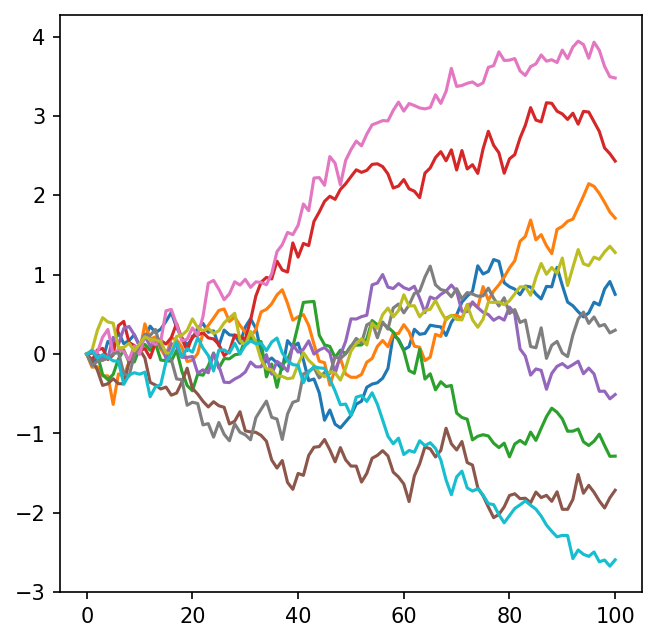

In [8]:


def brownian_motion_1D(x,delta,dt):
    start = 0 
    positions = [start]

    for n in range(x):
        positions.append(positions[-1]+np.random.normal(loc=0, scale=np.sqrt(delta*dt)))
 
    plt.plot(positions)
    
    
for i in range(10):
    brownian_motion_1D(100,0.2,0.1)  


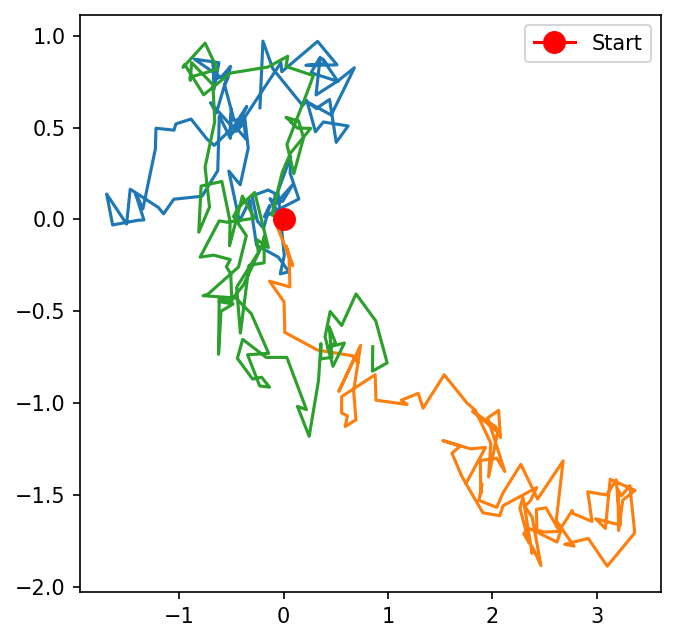

In [9]:

def brownian_motion_2D(x,delta,dt):
    start = (0,0) 
    positions = [start]

    for n in range(x):
        x=positions[-1][0] +np.random.normal(loc=0, scale=np.sqrt(delta*dt))
        y=positions[-1][1]+np.random.normal(loc=0, scale=np.sqrt(delta*dt))
        positions.append((x,y))
 
    x,y=np.array(positions).T
    plt.plot(x,y)
    

for i in range(3):
    brownian_motion_2D(100,0.2,0.1)  

plt.plot(0,0, marker='o', markersize=10, color='r',label='Start')
plt.legend()
plt.show()